In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire 
from sklearn.model_selection import train_test_split
from env import get_db_url
from scipy import stats
import sklearn.preprocessing
import wrangle_zillow as w 



In [2]:
df = acquire.get_zillow_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   typeconstructiontypeid      76 non-null     float64
 1   storytypeid                 47 non-null     float64
 2   propertylandusetypeid       52319 non-null  float64
 3   heatingorsystemtypeid       33849 non-null  float64
 4   buildingclasstypeid         0 non-null      float64
 5   architecturalstyletypeid    70 non-null     float64
 6   airconditioningtypeid       13615 non-null  float64
 7   parcelid                    52319 non-null  int64  
 8   id                          52319 non-null  int64  
 9   basementsqft                47 non-null     float64
 10  baths                       52319 non-null  float64
 11  beds                        52319 non-null  float64
 12  buildingqualitytypeid       33654 non-null  float64
 13  calculatedbathnbr           521

In [4]:
sample = w.data_prep(df)

In [5]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52255 entries, 0 to 52318
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       52255 non-null  float64
 1   heatingorsystemtypeid       33849 non-null  float64
 2   parcelid                    52255 non-null  int64  
 3   id                          52255 non-null  int64  
 4   baths                       52255 non-null  float64
 5   beds                        52255 non-null  float64
 6   buildingqualitytypeid       33654 non-null  float64
 7   calculatedbathnbr           52184 non-null  float64
 8   sqft                        52238 non-null  float64
 9   finishedsquarefeet12        52073 non-null  float64
 10  fips                        52255 non-null  float64
 11  fullbathcnt                 52184 non-null  float64
 12  latitude                    52255 non-null  float64
 13  longitude                   522

In [6]:
sample = w.remove_columns(df,['buildingqualitytypeid','propertyzoningdesc','unitcnt','heatingorsystemdesc'])
sample

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id.1,parcelid.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,Single Family Residential,NaN,NaN
4,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,781532,NaN,...,6,12095076,-0.001011,2017-01-01,Central,NaN,NaN,Single Family Residential,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12412492,2274245,NaN,...,77607,12412492,0.001082,2017-09-19,NaN,NaN,NaN,Single Family Residential,NaN,NaN
52315,NaN,NaN,261.0,2.0,NaN,NaN,NaN,11000655,673515,NaN,...,77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,Single Family Residential,NaN,NaN
52316,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17239384,2968375,NaN,...,77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,Single Family Residential,NaN,NaN
52317,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12773139,1843709,NaN,...,77611,12773139,0.037129,2017-09-21,Central,NaN,NaN,Single Family Residential,NaN,NaN


In [7]:
seta = w.data_prep(df,['parcelid.1','id.1','heatingorsystemtypeid','buildingqualitytypeid','propertyzoningdesc','unitcnt','heatingorsystemdesc'])

In [8]:
seta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52317 entries, 0 to 52318
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       52317 non-null  float64
 1   parcelid                    52317 non-null  int64  
 2   id                          52317 non-null  int64  
 3   baths                       52317 non-null  float64
 4   beds                        52317 non-null  float64
 5   calculatedbathnbr           52184 non-null  float64
 6   sqft                        52238 non-null  float64
 7   finishedsquarefeet12        52073 non-null  float64
 8   fips                        52317 non-null  float64
 9   fullbathcnt                 52184 non-null  float64
 10  latitude                    52317 non-null  float64
 11  longitude                   52317 non-null  float64
 12  lotsizesquarefeet           51953 non-null  float64
 13  propertycountylandusecode   523

In [9]:
df = seta

In [10]:
# Convert binary categorical variables to objects with name of location
cleanup_fips = {"fips":{6037: 'Los Angeles CA', 6059:'Orange County CA', 6111: 'Ventura County CA'} }    
df = df.replace(cleanup_fips)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52317 entries, 0 to 52318
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       52317 non-null  float64
 1   parcelid                    52317 non-null  int64  
 2   id                          52317 non-null  int64  
 3   baths                       52317 non-null  float64
 4   beds                        52317 non-null  float64
 5   calculatedbathnbr           52184 non-null  float64
 6   sqft                        52238 non-null  float64
 7   finishedsquarefeet12        52073 non-null  float64
 8   fips                        52317 non-null  object 
 9   fullbathcnt                 52184 non-null  float64
 10  latitude                    52317 non-null  float64
 11  longitude                   52317 non-null  float64
 12  lotsizesquarefeet           51953 non-null  float64
 13  propertycountylandusecode   523

In [12]:
samplea = df.sample(frac=.3)

## Explore questions 

## What is the spread of the log error?

<AxesSubplot:>

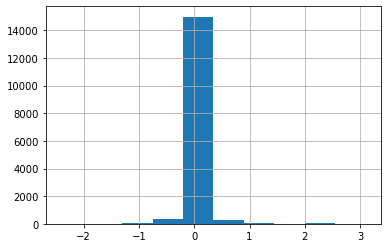

In [13]:
samplea.logerror.hist()

### Takeaways 

- Most of the log errors are located between 0 and 1 which is a good thing



## Is there a relationship between logerror and county code?

[Text(0.5, 1.0, 'Spread of logerror')]

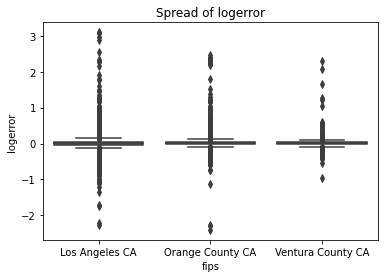

In [14]:
# box plot Fips vs logerror

sns.boxplot(data=samplea, x='fips', y='logerror').set(title='Spread of logerror')


In [15]:
# check variances for variables 
la = samplea[samplea.fips == 'Los Angeles CA'].logerror
oc = samplea[samplea.fips == 'Orange County CA'].logerror
vc = samplea[samplea.fips == 'Ventura County CA'].logerror

In [16]:
#variance check 
print(la.var())
print(oc.var())
print(vc.var())

0.02967515522847922
0.03946256093383583
0.020307361330855693


<AxesSubplot:>

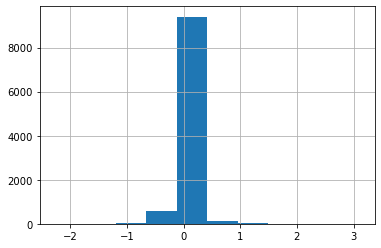

In [17]:
la.hist()

<AxesSubplot:>

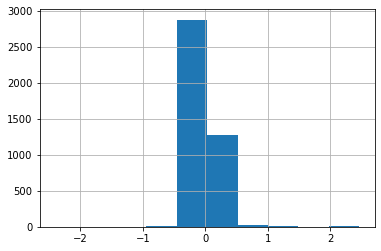

In [18]:
oc.hist()

<AxesSubplot:>

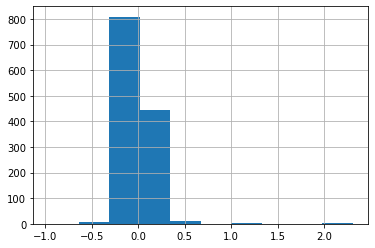

In [19]:
vc.hist()

In [20]:
stats.kruskal(la, oc, vc)

# variances are not similar, run non-parametric test 



KruskalResult(statistic=17.86739404941519, pvalue=0.0001318695970635323)

<AxesSubplot:xlabel='logerror', ylabel='Count'>

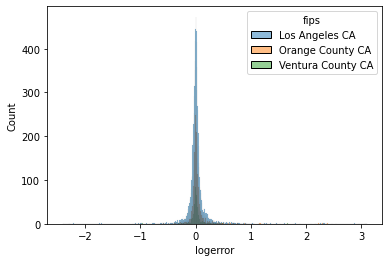

In [21]:
#histogram logerror and fips 
sns.histplot(data=samplea, x="logerror", hue = 'fips')


### Takeaways 

- Correlation between fips and logerror 

## Is there a relationship between logerror and bedrooms?

<AxesSubplot:xlabel='beds', ylabel='logerror'>

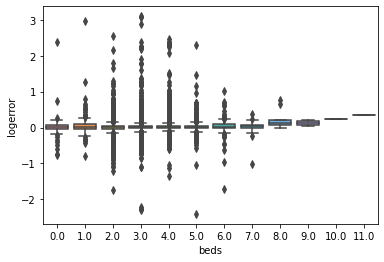

In [22]:
# box plot feature vs logerror
sns.boxplot(data=df, x=samplea['beds'], y=df['logerror'])



<AxesSubplot:xlabel='logerror', ylabel='beds'>

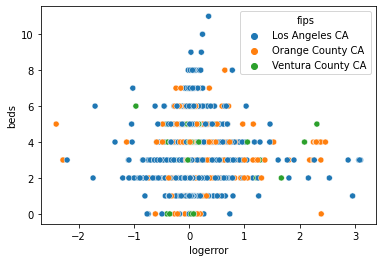

In [39]:
#scatter plot of bedrooms and logerror
sns.scatterplot(data=samplea, x="logerror", y="beds",hue ="fips")

In [23]:
# beds as continuous variable 
corr, p = stats.pearsonr(samplea['beds'], samplea.logerror)

corr,p

(0.03503812574301094, 1.1305711082257373e-05)

### Takeaways 

- logerror appears similar in all bedroom counts 
- Spread of logerror is widest between 2 and 5 bedrooms 
- weak correlation between beds and logerror

## Is there a relationship between logerror and bathrooms?

In [24]:
#samplea['baths'] = samplea['baths'].apply(np.ceil)


<AxesSubplot:xlabel='baths', ylabel='logerror'>

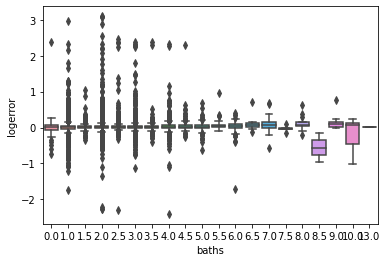

In [25]:
# box plot feature vs logerror
sns.boxplot(data=df, x=samplea['baths'], y=df['logerror'])

<AxesSubplot:xlabel='logerror', ylabel='baths'>

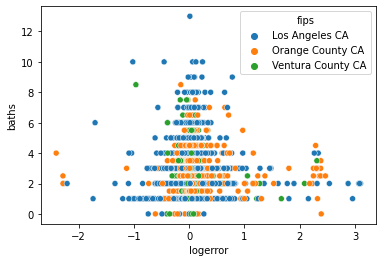

In [37]:
# bathrooms and logerror scatter plot
sns.scatterplot(data=samplea, x="logerror", y="baths",hue="fips")

In [27]:
# beds as continuous variable 
corr, p = stats.pearsonr(samplea['baths'], samplea.logerror)

corr,p

(0.029060503204104506, 0.000271402131087361)

### Takeaways 

- logerror appears similar in all bedroom counts 
- Spread of logerror is widest between 1 and 3 bedrooms 
- weak correlation between beds and logerror

## Is there a relationship between logerror and latitude?

In [28]:
samplea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15695 entries, 47658 to 5540
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       15695 non-null  float64
 1   parcelid                    15695 non-null  int64  
 2   id                          15695 non-null  int64  
 3   baths                       15695 non-null  float64
 4   beds                        15695 non-null  float64
 5   calculatedbathnbr           15654 non-null  float64
 6   sqft                        15665 non-null  float64
 7   finishedsquarefeet12        15611 non-null  float64
 8   fips                        15695 non-null  object 
 9   fullbathcnt                 15654 non-null  float64
 10  latitude                    15695 non-null  float64
 11  longitude                   15695 non-null  float64
 12  lotsizesquarefeet           15584 non-null  float64
 13  propertycountylandusecode   

In [29]:
samplea.latitude

47658    34141802.0
7655     33561557.0
37136    34081645.0
40652    34194553.0
27502    33562296.0
            ...    
25481    33847871.0
10966    33624329.0
7822     33796524.0
3894     34274184.0
5540     33928731.0
Name: latitude, Length: 15695, dtype: float64

<AxesSubplot:xlabel='logerror', ylabel='latitude'>

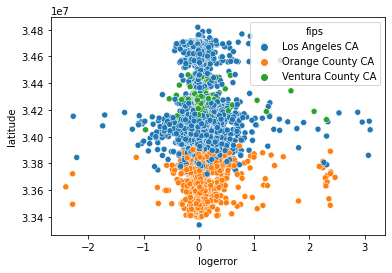

In [30]:
#scatter plot of logerror and lattitude

sns.scatterplot(data=samplea, x="logerror", y="latitude", hue = 'fips')



### Takeaways 

- 
- 
- 

## Is there a relationshp between logerror and longititude?

<AxesSubplot:xlabel='logerror', ylabel='longitude'>

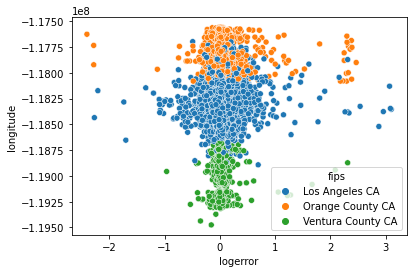

In [36]:
#scatter plot of logerror and lattitude

sns.scatterplot(data=samplea, x="logerror", y="longitude",hue = 'fips')

### Takeaways 

- 
- 
- 

## Is there a relationshp between logerror and sqft?

<AxesSubplot:xlabel='logerror', ylabel='sqft'>

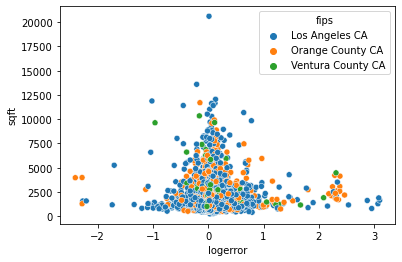

In [38]:
#scatter plot of logerror and lattitude

sns.scatterplot(data=samplea, x="logerror", y="sqft", hue = "fips")

<AxesSubplot:xlabel='logerror', ylabel='year_built'>

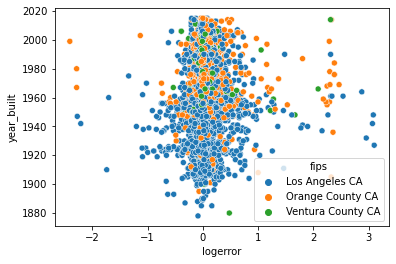

In [44]:

sns.scatterplot(data=samplea, x="logerror", y="year_built", hue = "fips")

<AxesSubplot:xlabel='logerror', ylabel='lotsizesquarefeet'>

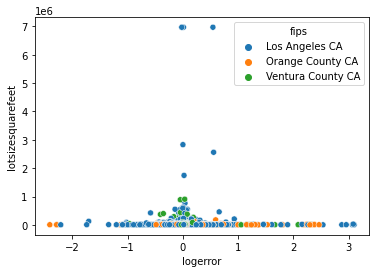

In [45]:
sns.scatterplot(data=samplea, x="logerror", y="lotsizesquarefeet", hue = "fips")